In [ ]:
# Libraries

import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load Dataset

df = pd.read_csv('https://raw.githubusercontent.com/renatomaaliw3/public_files/refs/heads/master/Data%20Sets/bitcoin_price.csv', parse_dates = True, index_col = 'Date')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


## Exploratory Data Analysis

In [ ]:
# Generate a 7-day rolling average for the Closing Price

df['Close'].rolling(window = 7).mean().head(7)

,Close
Date,
2014-09-17,NaN
2014-09-18,NaN
2014-09-19,NaN
2014-09-20,NaN
2014-09-21,NaN
2014-09-22,NaN
2014-09-23,417.462572


In [ ]:
# Generate a 7-day rolling average for the Closing Price

df['7 day closing avg'] = df['Close'].rolling(window = 100).mean()
df['7 day closing avg']
df

,Open,High,Low,Close,Adj Close,Volume,7 day closing avg
Date,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,NaN
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,NaN
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,NaN
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,NaN
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,NaN
...,...,...,...,...,...,...,...
2023-12-26,43599.847656,43603.175781,41676.488281,42520.402344,42520.402344,30026850982,34735.296465
2023-12-27,42518.468750,43683.160156,42167.582031,43442.855469,43442.855469,25260941032,34902.182207
2023-12-28,43468.199219,43804.781250,42318.550781,42627.855469,42627.855469,22992093014,35056.349590


<Axes: xlabel='Date'>

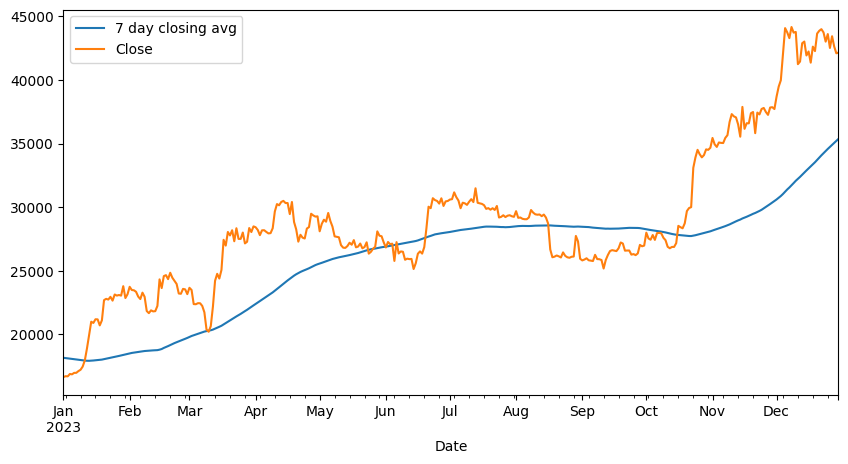

In [ ]:
# Plot

df[['7 day closing avg', 'Close']].loc['2023': '2025'].plot(figsize = (10, 5))

In [ ]:
# Find the month with the highest closing average

df.resample('ME').max()['Close'].idxmax()
df.resample('ME').max()['Close'].max()

67566.828125

In [ ]:
# Compute the percentage change for the Close variable

df['Daily Returns'] = df['Close'].pct_change() * 100
df

,Open,High,Low,Close,Adj Close,Volume,7 day closing avg,Daily Returns
Date,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,NaN,NaN
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,NaN,-7.192558
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,NaN,-6.984265
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,NaN,3.573492
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,NaN,-2.465854
...,...,...,...,...,...,...,...,...
2023-12-26,43599.847656,43603.175781,41676.488281,42520.402344,42520.402344,30026850982,34735.296465,-2.505525
2023-12-27,42518.468750,43683.160156,42167.582031,43442.855469,43442.855469,25260941032,34902.182207,2.169436
2023-12-28,43468.199219,43804.781250,42318.550781,42627.855469,42627.855469,22992093014,35056.349590,-1.876028


In [ ]:
# Check which days have more than 10% change in price

df[abs(df['Daily Returns']) > 10]['Daily Returns']

,Daily Returns
Date,
2014-11-12,15.193570
2015-01-03,-10.776686
2015-01-13,-15.659308
2015-01-14,-21.144862
2015-01-15,17.821709
...,...
2022-09-09,10.612188
2022-11-08,-10.006132
2022-11-09,-14.349022


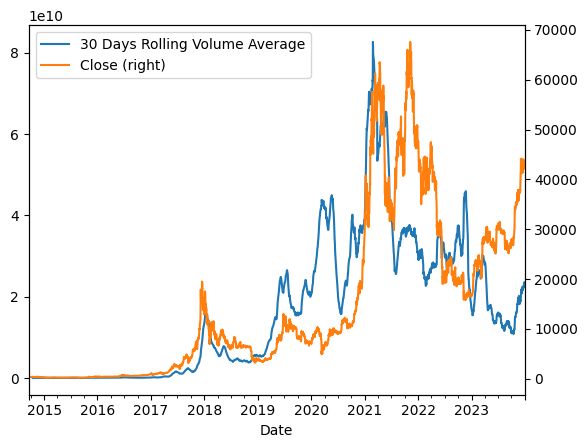

In [ ]:
# Is there a correlation between a 30 day rolling volume average with Close Pricing?

df['30 Days Rolling Volume Average'] = df['Volume'].rolling(window = 30).mean()

# df[['30 Days Rolling Volume Average', 'Close']].plot()

df[['30 Days Rolling Volume Average']].plot(legend = True)
ax = df['Close'].plot(secondary_y = True,legend = True)
plt.show()

In [ ]:
# Perform Correlation between Closing Price and 30 Day Rolling Volume

df[['Close','30 Days Rolling Volume Average']].corr() # Pearson Correlation

,Close,30 Days Rolling Volume Average
Close,1.000000,0.750445
30 Days Rolling Volume Average,0.750445,1.000000


## Data Manipulation



In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,7 day closing avg,Daily Returns,30 Days Rolling Volume Average
Date,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,NaN,NaN,NaN
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,NaN,-7.192558,NaN
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,NaN,-6.984265,NaN
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,NaN,3.573492,NaN
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,NaN,-2.465854,NaN


In [ ]:
# Missing Values?

df.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0
7 day closing avg,99
Daily Returns,1
30 Days Rolling Volume Average,29


In [ ]:
# More Data Manipulation
# Extract Time Variables

In [ ]:

df_02 = pd.read_csv('https://raw.githubusercontent.com/renatomaaliw3/public_files/refs/heads/master/Data%20Sets/bitcoin_price.csv', parse_dates = True, index_col = 'Date')
df_02.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [ ]:
# Extract time variables

df_02['year'] = df.index.year
df_02['month'] = df.index.month
df_02['day'] = df.index.day
df_02['day_of_week'] = df.index.dayofweek
df_02['weekday'] = df.index.day_name()
df_02['weekday_numeric'] = df.index.weekday

df_02

,Open,High,Low,Close,Adj Close,Volume,year,month,day,day_of_week,weekday,weekday_numeric
Date,,,,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,2014,9,17,2,Wednesday,2
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,2014,9,18,3,Thursday,3
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,2014,9,19,4,Friday,4
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,2014,9,20,5,Saturday,5
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,2014,9,21,6,Sunday,6
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,43599.847656,43603.175781,41676.488281,42520.402344,42520.402344,30026850982,2023,12,26,1,Tuesday,1
2023-12-27,42518.468750,43683.160156,42167.582031,43442.855469,43442.855469,25260941032,2023,12,27,2,Wednesday,2
2023-12-28,43468.199219,43804.781250,42318.550781,42627.855469,42627.855469,22992093014,2023,12,28,3,Thursday,3


In [ ]:
# Can you identify the weekends?

df_02['is_weekend'] = df_02['weekday_numeric'].isin([5, 6])
df_02

,Open,High,Low,Close,Adj Close,Volume,year,month,day,day_of_week,weekday,weekday_numeric,is_weekend
Date,,,,,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,2014,9,17,2,Wednesday,2,False
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,2014,9,18,3,Thursday,3,False
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,2014,9,19,4,Friday,4,False
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,2014,9,20,5,Saturday,5,True
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,2014,9,21,6,Sunday,6,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,43599.847656,43603.175781,41676.488281,42520.402344,42520.402344,30026850982,2023,12,26,1,Tuesday,1,False
2023-12-27,42518.468750,43683.160156,42167.582031,43442.855469,43442.855469,25260941032,2023,12,27,2,Wednesday,2,False
2023-12-28,43468.199219,43804.781250,42318.550781,42627.855469,42627.855469,22992093014,2023,12,28,3,Thursday,3,False


In [ ]:
# Feature Engineering (Lagged Variables) - Shifting

df['Close']
df['Close'].shift(1)

,Close
Date,
2014-09-17,NaN
2014-09-18,457.334015
2014-09-19,424.440002
2014-09-20,394.795990
2014-09-21,408.903992
...,...
2023-12-26,43613.140625
2023-12-27,42520.402344
2023-12-28,43442.855469
